In [70]:
import imp
from utils import utils
imp.reload(utils) 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
credit_data = pd.read_csv('../data_out/clean_credit_data.csv', dtype={'borrower_id': 'int64', 'age':'int64', 
                                                                     'serious_dlqin2yrs': 'int64', 'number_of_time30-59_days_past_due_not_worse': 'int64',
                                                                     'umber_of_open_credit_lines_and_loans':'int64', 'number_of_times90_days_late':'int64',
                                                                     'number_real_estate_loans_or_lines':'int64', 'number_of_time60-89_days_past_due_not_worse':'int64',
                                                                     'number_of_dependents':'int64'}, index_col=[0])

In [20]:
credit_data.head(10)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,1,0.766127,45,2,0.802982,9120,13.0,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600,4.0,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042,2.0,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300,5.0,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588,7.0,0,1,0,0
5,6,0,0.213179,74,0,0.375607,3500,3.0,0,1,0,1
6,7,0,0.305682,57,0,4937.130000,0,8.0,0,3,0,0
7,8,0,0.754464,39,0,0.209940,3500,8.0,0,0,0,0
8,9,0,0.116951,27,0,46.000000,0,2.0,0,0,0,0
9,10,0,0.189169,57,0,0.606291,23684,9.0,0,4,0,2


In [21]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148807 entries, 0 to 149999
Data columns (total 12 columns):
borrower_id                                    148807 non-null int64
serious_dlqin2yrs                              148807 non-null int64
revolving_utilization_of_unsecured_lines       148807 non-null float64
age                                            148807 non-null int64
number_of_time30-59_days_past_due_not_worse    148807 non-null int64
debt_ratio                                     148807 non-null float64
monthly_income                                 148807 non-null int64
number_of_open_credit_lines_and_loans          148807 non-null float64
number_of_times90_days_late                    148807 non-null int64
number_real_estate_loans_or_lines              148807 non-null int64
number_of_time60-89_days_past_due_not_worse    148807 non-null int64
number_of_dependents                           148807 non-null int64
dtypes: float64(3), int64(9)
memory usage: 14.8 MB


In [22]:
round(credit_data.describe(percentiles=[.01, .05, .10, .25, .50, .75, .90, .95, .99]), 2)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,148807.00,148807.00,148807.00,148807.00,148807.00,148807.00,148807.00,148807.00,148807.00,148807.00,148807.00,148807.00
mean,74998.24,0.06,0.31,52.33,0.24,316.00,5276.39,8.25,0.08,1.00,0.06,0.73
std,43305.55,0.24,0.34,14.75,0.66,903.06,5690.36,4.67,0.37,1.03,0.30,1.09
min,1.00,0.00,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,1497.06,0.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,7498.30,0.00,0.00,29.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
10%,14994.60,0.00,0.00,33.00,0.00,0.03,0.00,3.00,0.00,0.00,0.00,0.00
25%,37492.50,0.00,0.03,41.00,0.00,0.18,1782.00,5.00,0.00,0.00,0.00,0.00
50%,74998.00,0.00,0.15,52.00,0.00,0.37,4400.00,8.00,0.00,1.00,0.00,0.00
75%,112503.50,0.00,0.53,63.00,0.00,0.87,7400.00,11.00,0.00,2.00,0.00,1.00


## serious_dlqin2yrs

Column **serious_dlqin2yrs** represents when a borrower doesn't pay its debts for more than 90 days. We will explore if there are some patterns in data that help us to prevent giving a credit to this kind of borrowers.

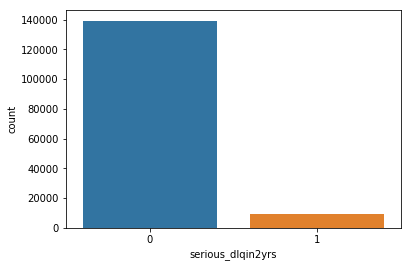

In [39]:
sns.countplot(credit_data.serious_dlqin2yrs);

In [41]:
print(credit_data.serious_dlqin2yrs.value_counts(normalize=True))

0    0.935971
1    0.064029
Name: serious_dlqin2yrs, dtype: float64


Unsurprisingly data suffer of high bias, cases of delinquency are rare and this is the kind of data distribution we can expect. 
Around 6.4% of granted credits are not paid. This is not a low rate and thus improve credit scores is an bussiness oportunity.

### Risk by borrower's age

In [71]:
age_vs_del = pd.DataFrame(index=['18_to_25','26_to_30','31_to_40','41_to_50','51_to_60','61_to_70','71_to_80','81_to_90','91_to_100'],
                         columns=['amount_of_borrowers', 'delinq_amount'])
age_vs_del.loc['18_to_25', 'delinq_amount'] = credit_data[(credit_data.age >= 18) & (credit_data.age <= 25)].serious_dlqin2yrs.sum()
age_vs_del.loc['26_to_30', 'delinq_amount'] = credit_data[(credit_data.age >= 26) & (credit_data.age <= 30)].serious_dlqin2yrs.sum()
age_vs_del.loc['31_to_40', 'delinq_amount'] = credit_data[(credit_data.age >= 31) & (credit_data.age <= 40)].serious_dlqin2yrs.sum()
age_vs_del.loc['41_to_50', 'delinq_amount'] = credit_data[(credit_data.age >= 41) & (credit_data.age <= 50)].serious_dlqin2yrs.sum()
age_vs_del.loc['51_to_60', 'delinq_amount'] = credit_data[(credit_data.age >= 51) & (credit_data.age <= 60)].serious_dlqin2yrs.sum()
age_vs_del.loc['61_to_70', 'delinq_amount'] = credit_data[(credit_data.age >= 61) & (credit_data.age <= 70)].serious_dlqin2yrs.sum()
age_vs_del.loc['71_to_80', 'delinq_amount'] = credit_data[(credit_data.age >= 71) & (credit_data.age <= 80)].serious_dlqin2yrs.sum()
age_vs_del.loc['81_to_90', 'delinq_amount'] = credit_data[(credit_data.age >= 81) & (credit_data.age <= 90)].serious_dlqin2yrs.sum()
age_vs_del.loc['91_to_100', 'delinq_amount'] = credit_data[(credit_data.age >= 91) & (credit_data.age <= 100)].serious_dlqin2yrs.sum()

age_vs_del.loc['18_to_25', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 18) & (credit_data.age <= 25)].age.count()
age_vs_del.loc['26_to_30', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 26) & (credit_data.age <= 30)].age.count()
age_vs_del.loc['31_to_40', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 31) & (credit_data.age <= 40)].age.count()
age_vs_del.loc['41_to_50', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 41) & (credit_data.age <= 50)].age.count()
age_vs_del.loc['51_to_60', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 51) & (credit_data.age <= 60)].age.count()
age_vs_del.loc['61_to_70', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 61) & (credit_data.age <= 70)].age.count()
age_vs_del.loc['71_to_80', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 71) & (credit_data.age <= 80)].age.count()
age_vs_del.loc['81_to_90', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 81) & (credit_data.age <= 90)].age.count()
age_vs_del.loc['91_to_100', 'amount_of_borrowers'] = credit_data[(credit_data.age >= 91) & (credit_data.age <= 100)].age.count()

#Percentage of debtors by age

age_vs_del['delinq_ratio'] = age_vs_del.apply(utils.get_ratio, args=('delinq_amount', 'amount_of_borrowers'), axis=1)

In [75]:
age_vs_del.sort_values(by='delinq_ratio', ascending=False)

,amount_of_borrowers,delinq_amount,delinq_ratio
26_to_30,7636,855,0.11
18_to_25,2925,299,0.10
31_to_40,24135,2287,0.09
41_to_50,34720,2753,0.08
51_to_60,34565,2035,0.06
61_to_70,27279,913,0.03
71_to_80,12666,290,0.02
81_to_90,4438,88,0.02
91_to_100,443,8,0.02


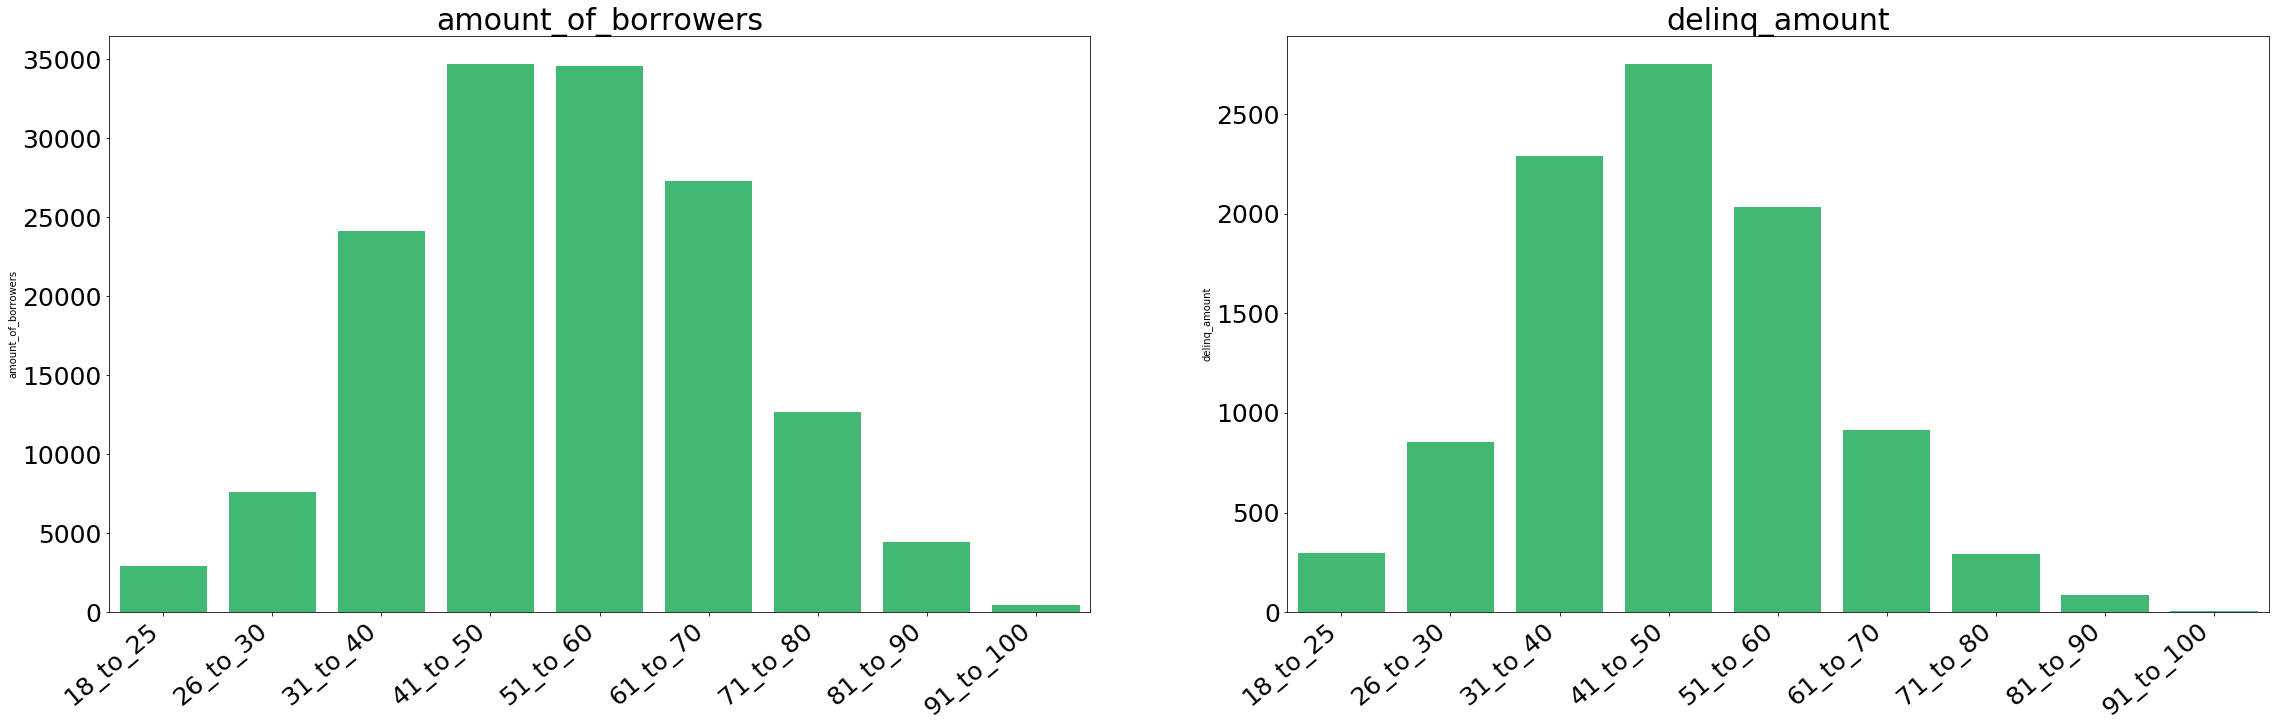

In [102]:
#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histograms
ax1 = sns.barplot(x=age_vs_del.index , y='amount_of_borrowers', data=age_vs_del, ax=axes_1, color='#2ecc71');
ax2 = sns.barplot(x=age_vs_del.index , y='delinq_amount', data=age_vs_del, ax=axes_2, color='#2ecc71');

    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=25)
axes_2.tick_params(labelsize=25)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

axes_1.set_title('amount_of_borrowers',fontsize= 30)
axes_2.set_title('delinq_amount',fontsize= 30)


#Show
plt.show()


Most of borrowers are between 40 and 60 years old, being the ones bewteen 41 and 50 years old more risky than borrowers between 50 and 60.
Another interesting thing is that borrowers under 30 years old are the more risky, this is interesting since these group represents new clients for the bank or the organization giving the loans. This could happen for many things and one of the reasons can be that credit scores has little or no finantial information about young people, many starting in the finantial world and with less stability than older borrowers.

## Borrower's monthly income

### Zero monthly income

As we can see from the previously described data, 10% of the borrowers has indicated a monthly income of 0, this is very weird. We will see if there is any relation between data that help us to understand what is happening.

In [103]:
zero_income = credit_data[credit_data.monthly_income == 0]

In [105]:
zero_income.serious_dlqin2yrs.value_counts(normalize=True)

0    0.94665
1    0.05335
Name: serious_dlqin2yrs, dtype: float64

As we can see there is no relation between zero income borrowers and delinquent acts, actually  the percentage of people within this population that doesn't pay is lower than the general population making it a more healthy population.

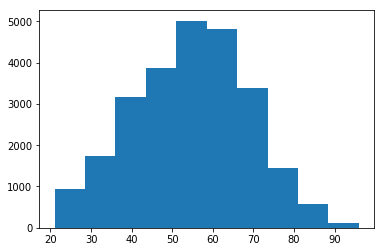

In [110]:
 zero_income.age.hist(grid=False);

In [111]:
zero_income.describe()

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,25061.000000,25061.000000,25061.000000,25061.000000,25061.000000,25061.000000,25061.0,25061.000000,25061.000000,25061.000000,25061.000000,25061.000000
mean,74749.825586,0.053350,0.272453,54.387534,0.196161,1799.122288,0.0,7.726491,0.067515,1.006544,0.055943,0.348390
std,43419.716701,0.224735,0.332853,14.094743,0.594054,1393.522207,0.0,4.389720,0.339814,0.895117,0.294913,0.845891
min,7.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36541.000000,0.000000,0.025272,44.000000,0.000000,627.000000,0.0,4.000000,0.000000,0.000000,0.000000,0.000000
50%,74816.000000,0.000000,0.104654,55.000000,0.000000,1533.000000,0.0,7.000000,0.000000,1.000000,0.000000,0.000000
75%,112520.000000,0.000000,0.412843,64.000000,0.000000,2643.000000,0.0,10.000000,0.000000,2.000000,0.000000,0.000000
max,149998.000000,1.000000,1.089995,96.000000,6.000000,4937.130000,0.0,24.000000,4.000000,5.000000,4.000000,6.000000
